# MB Spring 25 Setlist Analysis

## Import Modules and get spreadsheet

In [1]:
# Import modules
import pandas as pd
import requests
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv
# TODO: Change the URL to the one you want to use. You can do this by doing File -> Share -> Publish to the web -> Comma-separated values (.csv). We are assuming standard Melon Band setlist suggestions format.
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vR8YF4fLD9X3x0WzCzsuLrGJRlS_T_lDVpoQaORPIB7LIOdpCrysxSEAGFb3WKg_Ge3nsBOySHJ_3PW/pub?gid=1046340364&single=true&output=csv')
data = r.content

In [3]:
df_main = pd.read_csv(BytesIO(data))


## Cleaning the dataset

In [4]:
df = pd.read_csv(BytesIO(data))
df

,Suggestor,Song,Show,Artist,Resources \nto use,Interested,Arranger,Main Vox,Harmony/ Backup Vox,Lead Guitar,...,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other,Additional Comments,Notes
0,Aaron,SiM – The Rumbling (OFFICIAL VIDEO) - YouTube,Attack on Titan Final Season,SiM (Silence iz Mine),Online Tabs / By Ear,"Andrew, Gabriel",1? (Aaron),"1/2\n(Flo, Hei)","1+\n(Flo, Aaron, Orlando)",1 \n(Aaron),...,1\n(Thomas)\n,NaN,"1\n(Flo)\n[Cannan, Angela]",NaN,NaN,NaN,NaN,NaN,"EXTENDED RANGE GUITARS, SCREAMING, RAWR, also ...",Metal
1,Aaron,ONE OK ROCK - The Beginning [Official Music Vi...,Ruroni Kenshin Live Action,ONE OK ROCK,Online Tabs / By Ear,NaN,1? (Aaron),1 \n(Shin)\n[Ruka],"1\n(Flo)\n[Cannan, Ruka]",1 \n(Aaron),...,1 \n(Adrian),1 \n(Angela)\n[Michael],1\n\n[Cannan],NaN,NaN,NaN,NaN,NaN,"Piano/Synth can be done by one person, Instrum...",Metal
2,Aaron\n(Encore),Inkya Impulse (インキャインパルス) Asobi Asobase Ending...,Asobi Asobase,"CV: Hina Kino, CV: Rika Nagae, CV: Konomi Koha...",Online Tabs,Gabriel,1? (Aaron),"2 \n(Hei, Silas, Flo)","1+\n(Aaron, Flo, Silas)",1 \n(Aaron),...,1\n\n[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SCREAMS AND CUTE GIRLS SINGING, extended range...",Metal
3,Adrian,乙女どもよ。\nOtomedomoyo,O Maidens in Your Savage Season,CHiCO with Honeyworks,Online tabs / by ear,Gabriel,Justin + Greta working,1\n（Sophia）\n[Mimi],1?,1 \n(Justin),...,1 \n(Adrian),1\n(Cannan),1/2 \n(Cannan synth 1)\n[Kai],1\n\n[Kai],"3\n\n[Andrew, Julian, Chelle]",NaN,NaN,NaN,"If metric, then strings will be barely audible...",NaN
4,Adrian,Happy Selfishness,\nN/A,Sangatsu no Phantasia,Arrangement / by ear,Gabriel,(Jamie),1\n\n(Sophia),1?,1 \n(Justin),...,1 \n(Adrian),1\n(Cannan),1 \n\n[Kai],NaN,NaN,NaN,NaN,NaN,"Synth effect same as Inferno (winter24), harmo...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,NaN,NaN,NaN,Orlando,15,2,7,7,0,2.54%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,Kevin,30,1,8,8,0,5.08%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,Eli,2,1,3,3,0,0.34%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,Jane,1,0,1,1,0,0.17%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop rows after and including row 86
df = df.drop(df.index[86:])
df

,Suggestor,Song,Show,Artist,Resources \nto use,Interested,Arranger,Main Vox,Harmony/ Backup Vox,Lead Guitar,...,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other,Additional Comments,Notes
0,Aaron,SiM – The Rumbling (OFFICIAL VIDEO) - YouTube,Attack on Titan Final Season,SiM (Silence iz Mine),Online Tabs / By Ear,"Andrew, Gabriel",1? (Aaron),"1/2\n(Flo, Hei)","1+\n(Flo, Aaron, Orlando)",1 \n(Aaron),...,1\n(Thomas)\n,NaN,"1\n(Flo)\n[Cannan, Angela]",NaN,NaN,NaN,NaN,NaN,"EXTENDED RANGE GUITARS, SCREAMING, RAWR, also ...",Metal
1,Aaron,ONE OK ROCK - The Beginning [Official Music Vi...,Ruroni Kenshin Live Action,ONE OK ROCK,Online Tabs / By Ear,NaN,1? (Aaron),1 \n(Shin)\n[Ruka],"1\n(Flo)\n[Cannan, Ruka]",1 \n(Aaron),...,1 \n(Adrian),1 \n(Angela)\n[Michael],1\n\n[Cannan],NaN,NaN,NaN,NaN,NaN,"Piano/Synth can be done by one person, Instrum...",Metal
2,Aaron\n(Encore),Inkya Impulse (インキャインパルス) Asobi Asobase Ending...,Asobi Asobase,"CV: Hina Kino, CV: Rika Nagae, CV: Konomi Koha...",Online Tabs,Gabriel,1? (Aaron),"2 \n(Hei, Silas, Flo)","1+\n(Aaron, Flo, Silas)",1 \n(Aaron),...,1\n\n[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SCREAMS AND CUTE GIRLS SINGING, extended range...",Metal
3,Adrian,乙女どもよ。\nOtomedomoyo,O Maidens in Your Savage Season,CHiCO with Honeyworks,Online tabs / by ear,Gabriel,Justin + Greta working,1\n（Sophia）\n[Mimi],1?,1 \n(Justin),...,1 \n(Adrian),1\n(Cannan),1/2 \n(Cannan synth 1)\n[Kai],1\n\n[Kai],"3\n\n[Andrew, Julian, Chelle]",NaN,NaN,NaN,"If metric, then strings will be barely audible...",NaN
4,Adrian,Happy Selfishness,\nN/A,Sangatsu no Phantasia,Arrangement / by ear,Gabriel,(Jamie),1\n\n(Sophia),1?,1 \n(Justin),...,1 \n(Adrian),1\n(Cannan),1 \n\n[Kai],NaN,NaN,NaN,NaN,NaN,"Synth effect same as Inferno (winter24), harmo...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thomas,Mixed Nuts,Spy Family,OFFICIAL HIGE DANDISM,Online tabs / by ear,Andrew\nAdrian,Greta has an arrangement already,"1 \n (Silas, Andrew, Mimi)",1? \n,1\n(KH)\n[Aaron],...,"1 \n(Thomas, Weng Kit)","1 \n(Cannan, Michael)",NaN,NaN,NaN,"3\n(Jeffrey, Weng Kit)\n[Richard]","2\n(Gab, Ruka)\n[Chiedozie]",NaN,ideal brass:\n2 trumpet (1 can be sop sax)\n2 ...,Brass super heavy
82,Thomas,Zenzenzense,Your Name,RADWIMPS,Online tabs / by ear,"Andrew\nchiedozie, Gabriel",1,"1 \n(Kevin, Silas, Ruka)","1 \n\n[Silas, Ruka]",1 \n(Aaron)\n[Terry],...,1 \n(Thomas)\n[Weng Kit],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Thomas\n(encore),一途,JJK 0,King Gnu,Online tabs / by ear,Gabriel,1,2 \n(Emerald)\n[Kevin],NaN,1,...,1 \n(Thomas),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Could use a megaphone for vocal effects,NaN
84,Weng Kit,AmeWoMatsu,NaN,minami,online/by ear,"Orlando, emerald, Gabriel",NaN,1\n(Emerald),NaN,1\n(Aaron),...,1\n(Weng Kit),1 \n\n[Michael],1 \n,NaN,"1\n\n[Andrew, Julian]",NaN,NaN,NaN,https://music.youtube.com/watch?v=TFALdg7HUJU&...,NaN


In [6]:
# For columns 7-18, add two additional columns, one with the original column name + " want to" and one with the original column name + " don't mind".
# Save this to a new dataframe called df_cleaned. Afterwards, delete the original columns 7-18 from df_cleaned.
columns_to_expand = df.columns[7:19]
df_cleaned = df.copy()

for col in columns_to_expand:
    df_cleaned[col + ' want to'] = df_cleaned[col]
    df_cleaned[col + ' don\'t mind'] = df_cleaned[col]

df_cleaned = df_cleaned.drop(columns=columns_to_expand)
df_cleaned

,Suggestor,Song,Show,Artist,Resources \nto use,Interested,Arranger,Other,Additional Comments,Notes,...,Synth want to,Synth don't mind,Ac Guitar want to,Ac Guitar don't mind,Strings want to,Strings don't mind,Brass want to,Brass don't mind,Wind/Sax want to,Wind/Sax don't mind
0,Aaron,SiM – The Rumbling (OFFICIAL VIDEO) - YouTube,Attack on Titan Final Season,SiM (Silence iz Mine),Online Tabs / By Ear,"Andrew, Gabriel",1? (Aaron),NaN,"EXTENDED RANGE GUITARS, SCREAMING, RAWR, also ...",Metal,...,"1\n(Flo)\n[Cannan, Angela]","1\n(Flo)\n[Cannan, Angela]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron,ONE OK ROCK - The Beginning [Official Music Vi...,Ruroni Kenshin Live Action,ONE OK ROCK,Online Tabs / By Ear,NaN,1? (Aaron),NaN,"Piano/Synth can be done by one person, Instrum...",Metal,...,1\n\n[Cannan],1\n\n[Cannan],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron\n(Encore),Inkya Impulse (インキャインパルス) Asobi Asobase Ending...,Asobi Asobase,"CV: Hina Kino, CV: Rika Nagae, CV: Konomi Koha...",Online Tabs,Gabriel,1? (Aaron),NaN,"SCREAMS AND CUTE GIRLS SINGING, extended range...",Metal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adrian,乙女どもよ。\nOtomedomoyo,O Maidens in Your Savage Season,CHiCO with Honeyworks,Online tabs / by ear,Gabriel,Justin + Greta working,NaN,"If metric, then strings will be barely audible...",NaN,...,1/2 \n(Cannan synth 1)\n[Kai],1/2 \n(Cannan synth 1)\n[Kai],1\n\n[Kai],1\n\n[Kai],"3\n\n[Andrew, Julian, Chelle]","3\n\n[Andrew, Julian, Chelle]",NaN,NaN,NaN,NaN
4,Adrian,Happy Selfishness,\nN/A,Sangatsu no Phantasia,Arrangement / by ear,Gabriel,(Jamie),NaN,"Synth effect same as Inferno (winter24), harmo...",NaN,...,1 \n\n[Kai],1 \n\n[Kai],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thomas,Mixed Nuts,Spy Family,OFFICIAL HIGE DANDISM,Online tabs / by ear,Andrew\nAdrian,Greta has an arrangement already,NaN,ideal brass:\n2 trumpet (1 can be sop sax)\n2 ...,Brass super heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,"3\n(Jeffrey, Weng Kit)\n[Richard]","3\n(Jeffrey, Weng Kit)\n[Richard]","2\n(Gab, Ruka)\n[Chiedozie]","2\n(Gab, Ruka)\n[Chiedozie]"
82,Thomas,Zenzenzense,Your Name,RADWIMPS,Online tabs / by ear,"Andrew\nchiedozie, Gabriel",1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Thomas\n(encore),一途,JJK 0,King Gnu,Online tabs / by ear,Gabriel,1,NaN,Could use a megaphone for vocal effects,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Weng Kit,AmeWoMatsu,NaN,minami,online/by ear,"Orlando, emerald, Gabriel",NaN,NaN,https://music.youtube.com/watch?v=TFALdg7HUJU&...,NaN,...,1 \n,1 \n,NaN,NaN,"1\n\n[Andrew, Julian]","1\n\n[Andrew, Julian]",NaN,NaN,NaN,NaN


In [7]:
df_cleaned.columns

Index(['Suggestor', 'Song', 'Show', 'Artist ', 'Resources \nto use',
       'Interested', 'Arranger', 'Other', 'Additional Comments', 'Notes',
       'Main Vox want to', 'Main Vox don't mind',
       'Harmony/ Backup Vox want to', 'Harmony/ Backup Vox don't mind',
       'Lead Guitar want to', 'Lead Guitar don't mind',
       'Rhythm Guitar want to', 'Rhythm Guitar don't mind', 'Bass want to',
       'Bass don't mind', 'Drums want to', 'Drums don't mind', 'Keys want to',
       'Keys don't mind', 'Synth want to', 'Synth don't mind',
       'Ac Guitar want to', 'Ac Guitar don't mind', 'Strings want to',
       'Strings don't mind', 'Brass want to', 'Brass don't mind',
       'Wind/Sax want to', 'Wind/Sax don't mind'],
      dtype='object')

In [8]:
# In all columns for "want to", remove all names that are enclosed in []. In all columns for "don't mind", remove all names that are enclosed in ().
# Save the cleaned dataframe to df_cleaned.
for col in df_cleaned.columns:
    if 'want to' in col:
        df_cleaned[col] = df_cleaned[col].str.replace(r'\[.*?\]', '', regex=True)
    elif 'don\'t mind' in col:
        df_cleaned[col] = df_cleaned[col].str.replace(r'\(.*?\)', '', regex=True)

df_cleaned

,Suggestor,Song,Show,Artist,Resources \nto use,Interested,Arranger,Other,Additional Comments,Notes,...,Synth want to,Synth don't mind,Ac Guitar want to,Ac Guitar don't mind,Strings want to,Strings don't mind,Brass want to,Brass don't mind,Wind/Sax want to,Wind/Sax don't mind
0,Aaron,SiM – The Rumbling (OFFICIAL VIDEO) - YouTube,Attack on Titan Final Season,SiM (Silence iz Mine),Online Tabs / By Ear,"Andrew, Gabriel",1? (Aaron),NaN,"EXTENDED RANGE GUITARS, SCREAMING, RAWR, also ...",Metal,...,1\n(Flo)\n,"1\n\n[Cannan, Angela]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron,ONE OK ROCK - The Beginning [Official Music Vi...,Ruroni Kenshin Live Action,ONE OK ROCK,Online Tabs / By Ear,NaN,1? (Aaron),NaN,"Piano/Synth can be done by one person, Instrum...",Metal,...,1\n\n,1\n\n[Cannan],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron\n(Encore),Inkya Impulse (インキャインパルス) Asobi Asobase Ending...,Asobi Asobase,"CV: Hina Kino, CV: Rika Nagae, CV: Konomi Koha...",Online Tabs,Gabriel,1? (Aaron),NaN,"SCREAMS AND CUTE GIRLS SINGING, extended range...",Metal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adrian,乙女どもよ。\nOtomedomoyo,O Maidens in Your Savage Season,CHiCO with Honeyworks,Online tabs / by ear,Gabriel,Justin + Greta working,NaN,"If metric, then strings will be barely audible...",NaN,...,1/2 \n(Cannan synth 1)\n,1/2 \n\n[Kai],1\n\n,1\n\n[Kai],3\n\n,"3\n\n[Andrew, Julian, Chelle]",NaN,NaN,NaN,NaN
4,Adrian,Happy Selfishness,\nN/A,Sangatsu no Phantasia,Arrangement / by ear,Gabriel,(Jamie),NaN,"Synth effect same as Inferno (winter24), harmo...",NaN,...,1 \n\n,1 \n\n[Kai],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thomas,Mixed Nuts,Spy Family,OFFICIAL HIGE DANDISM,Online tabs / by ear,Andrew\nAdrian,Greta has an arrangement already,NaN,ideal brass:\n2 trumpet (1 can be sop sax)\n2 ...,Brass super heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,"3\n(Jeffrey, Weng Kit)\n",3\n\n[Richard],"2\n(Gab, Ruka)\n",2\n\n[Chiedozie]
82,Thomas,Zenzenzense,Your Name,RADWIMPS,Online tabs / by ear,"Andrew\nchiedozie, Gabriel",1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Thomas\n(encore),一途,JJK 0,King Gnu,Online tabs / by ear,Gabriel,1,NaN,Could use a megaphone for vocal effects,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Weng Kit,AmeWoMatsu,NaN,minami,online/by ear,"Orlando, emerald, Gabriel",NaN,NaN,https://music.youtube.com/watch?v=TFALdg7HUJU&...,NaN,...,1 \n,1 \n,NaN,NaN,1\n\n,"1\n\n[Andrew, Julian]",NaN,NaN,NaN,NaN


In [9]:
# For all want to and don't mind columns, remove all \n, () and [] characters.
# Save the cleaned dataframe to df_cleaned.

for col in df_cleaned.columns:
    df_cleaned[col] = df_cleaned[col].str.replace(r'\n', '', regex=True)
    df_cleaned[col] = df_cleaned[col].str.replace(r'\[', '', regex=True)
    df_cleaned[col] = df_cleaned[col].str.replace(r'\]', '', regex=True)
    df_cleaned[col] = df_cleaned[col].str.replace(r'\(', '', regex=True)
    df_cleaned[col] = df_cleaned[col].str.replace(r'\)', '', regex=True)

df_cleaned

,Suggestor,Song,Show,Artist,Resources \nto use,Interested,Arranger,Other,Additional Comments,Notes,...,Synth want to,Synth don't mind,Ac Guitar want to,Ac Guitar don't mind,Strings want to,Strings don't mind,Brass want to,Brass don't mind,Wind/Sax want to,Wind/Sax don't mind
0,Aaron,SiM – The Rumbling OFFICIAL VIDEO - YouTube,Attack on Titan Final Season,SiM Silence iz Mine,Online Tabs / By Ear,"Andrew, Gabriel",1? Aaron,NaN,"EXTENDED RANGE GUITARS, SCREAMING, RAWR, also ...",Metal,...,1Flo,"1Cannan, Angela",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron,ONE OK ROCK - The Beginning Official Music Vid...,Ruroni Kenshin Live Action,ONE OK ROCK,Online Tabs / By Ear,NaN,1? Aaron,NaN,"Piano/Synth can be done by one person, Instrum...",Metal,...,1,1Cannan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AaronEncore,Inkya Impulse インキャインパルス Asobi Asobase Ending F...,Asobi Asobase,"CV: Hina Kino, CV: Rika Nagae, CV: Konomi Koha...",Online Tabs,Gabriel,1? Aaron,NaN,"SCREAMS AND CUTE GIRLS SINGING, extended range...",Metal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adrian,乙女どもよ。Otomedomoyo,O Maidens in Your Savage Season,CHiCO with Honeyworks,Online tabs / by ear,Gabriel,Justin + Greta working,NaN,"If metric, then strings will be barely audible...",NaN,...,1/2 Cannan synth 1,1/2 Kai,1,1Kai,3,"3Andrew, Julian, Chelle",NaN,NaN,NaN,NaN
4,Adrian,Happy Selfishness,N/A,Sangatsu no Phantasia,Arrangement / by ear,Gabriel,Jamie,NaN,"Synth effect same as Inferno winter24, harmony...",NaN,...,1,1 Kai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thomas,Mixed Nuts,Spy Family,OFFICIAL HIGE DANDISM,Online tabs / by ear,AndrewAdrian,Greta has an arrangement already,NaN,ideal brass:2 trumpet 1 can be sop sax2 tenor ...,Brass super heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,"3Jeffrey, Weng Kit",3Richard,"2Gab, Ruka",2Chiedozie
82,Thomas,Zenzenzense,Your Name,RADWIMPS,Online tabs / by ear,"Andrewchiedozie, Gabriel",1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Thomasencore,一途,JJK 0,King Gnu,Online tabs / by ear,Gabriel,1,NaN,Could use a megaphone for vocal effects,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Weng Kit,AmeWoMatsu,NaN,minami,online/by ear,"Orlando, emerald, Gabriel",NaN,NaN,https://music.youtube.com/watch?v=TFALdg7HUJU&...,NaN,...,1,1,NaN,NaN,1,"1Andrew, Julian",NaN,NaN,NaN,NaN


In [10]:
# For all "don't mind" columns, remove all integers.
# Save the cleaned dataframe to df_cleaned.
for col in df_cleaned.columns:
    if 'don\'t mind' in col:
        df_cleaned[col] = df_cleaned[col].str.replace(r'\d+', '', regex=True)

df_cleaned

,Suggestor,Song,Show,Artist,Resources \nto use,Interested,Arranger,Other,Additional Comments,Notes,...,Synth want to,Synth don't mind,Ac Guitar want to,Ac Guitar don't mind,Strings want to,Strings don't mind,Brass want to,Brass don't mind,Wind/Sax want to,Wind/Sax don't mind
0,Aaron,SiM – The Rumbling OFFICIAL VIDEO - YouTube,Attack on Titan Final Season,SiM Silence iz Mine,Online Tabs / By Ear,"Andrew, Gabriel",1? Aaron,NaN,"EXTENDED RANGE GUITARS, SCREAMING, RAWR, also ...",Metal,...,1Flo,"Cannan, Angela",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron,ONE OK ROCK - The Beginning Official Music Vid...,Ruroni Kenshin Live Action,ONE OK ROCK,Online Tabs / By Ear,NaN,1? Aaron,NaN,"Piano/Synth can be done by one person, Instrum...",Metal,...,1,Cannan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AaronEncore,Inkya Impulse インキャインパルス Asobi Asobase Ending F...,Asobi Asobase,"CV: Hina Kino, CV: Rika Nagae, CV: Konomi Koha...",Online Tabs,Gabriel,1? Aaron,NaN,"SCREAMS AND CUTE GIRLS SINGING, extended range...",Metal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adrian,乙女どもよ。Otomedomoyo,O Maidens in Your Savage Season,CHiCO with Honeyworks,Online tabs / by ear,Gabriel,Justin + Greta working,NaN,"If metric, then strings will be barely audible...",NaN,...,1/2 Cannan synth 1,/ Kai,1,Kai,3,"Andrew, Julian, Chelle",NaN,NaN,NaN,NaN
4,Adrian,Happy Selfishness,N/A,Sangatsu no Phantasia,Arrangement / by ear,Gabriel,Jamie,NaN,"Synth effect same as Inferno winter24, harmony...",NaN,...,1,Kai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thomas,Mixed Nuts,Spy Family,OFFICIAL HIGE DANDISM,Online tabs / by ear,AndrewAdrian,Greta has an arrangement already,NaN,ideal brass:2 trumpet 1 can be sop sax2 tenor ...,Brass super heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,"3Jeffrey, Weng Kit",Richard,"2Gab, Ruka",Chiedozie
82,Thomas,Zenzenzense,Your Name,RADWIMPS,Online tabs / by ear,"Andrewchiedozie, Gabriel",1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Thomasencore,一途,JJK 0,King Gnu,Online tabs / by ear,Gabriel,1,NaN,Could use a megaphone for vocal effects,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Weng Kit,AmeWoMatsu,NaN,minami,online/by ear,"Orlando, emerald, Gabriel",NaN,NaN,https://music.youtube.com/watch?v=TFALdg7HUJU&...,NaN,...,1,,NaN,NaN,1,"Andrew, Julian",NaN,NaN,NaN,NaN


In [11]:
# For all "want to" columns, there are integers in there. 
# Create new columns for each column called "players needed" and take the integer from the "want to" column and put it in the "players needed" column. 
# If there is a ? after the integer, that means the instrument is optional. Do not count it in the "players needed" column. Remove the integer from the "want to" column.
# If there is a + after the integer, that means at least that many instruments are needed. Remove the integer from the "want to" column.
# Remove the "want to" from the column name and remove the integer from the "want to" column.
# Save the cleaned dataframe to df_cleaned.

for col in df_cleaned.columns:
    if 'want to' in col:
        instrument_needed_col = col.replace('want to', 'players needed')
        df_cleaned[instrument_needed_col] = df_cleaned[col].str.extract(r'(\d+)[^\?+]*$').fillna(0).astype(int)
        df_cleaned[col] = df_cleaned[col].str.replace(r'\d+\??\+?', '', regex=True).str.strip()
        df_cleaned[instrument_needed_col] = df_cleaned[instrument_needed_col].where(df_cleaned[col].str.contains(r'\?') == False, 0)

df_cleaned


,Suggestor,Song,Show,Artist,Resources \nto use,Interested,Arranger,Other,Additional Comments,Notes,...,Lead Guitar players needed,Rhythm Guitar players needed,Bass players needed,Drums players needed,Keys players needed,Synth players needed,Ac Guitar players needed,Strings players needed,Brass players needed,Wind/Sax players needed
0,Aaron,SiM – The Rumbling OFFICIAL VIDEO - YouTube,Attack on Titan Final Season,SiM Silence iz Mine,Online Tabs / By Ear,"Andrew, Gabriel",1? Aaron,NaN,"EXTENDED RANGE GUITARS, SCREAMING, RAWR, also ...",Metal,...,1,1,1,1,0,1,0,0,0,0
1,Aaron,ONE OK ROCK - The Beginning Official Music Vid...,Ruroni Kenshin Live Action,ONE OK ROCK,Online Tabs / By Ear,NaN,1? Aaron,NaN,"Piano/Synth can be done by one person, Instrum...",Metal,...,1,0,1,1,1,1,0,0,0,0
2,AaronEncore,Inkya Impulse インキャインパルス Asobi Asobase Ending F...,Asobi Asobase,"CV: Hina Kino, CV: Rika Nagae, CV: Konomi Koha...",Online Tabs,Gabriel,1? Aaron,NaN,"SCREAMS AND CUTE GIRLS SINGING, extended range...",Metal,...,1,1,1,1,0,0,0,0,0,0
3,Adrian,乙女どもよ。Otomedomoyo,O Maidens in Your Savage Season,CHiCO with Honeyworks,Online tabs / by ear,Gabriel,Justin + Greta working,NaN,"If metric, then strings will be barely audible...",NaN,...,1,1,1,1,1,1,1,3,0,0
4,Adrian,Happy Selfishness,N/A,Sangatsu no Phantasia,Arrangement / by ear,Gabriel,Jamie,NaN,"Synth effect same as Inferno winter24, harmony...",NaN,...,1,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thomas,Mixed Nuts,Spy Family,OFFICIAL HIGE DANDISM,Online tabs / by ear,AndrewAdrian,Greta has an arrangement already,NaN,ideal brass:2 trumpet 1 can be sop sax2 tenor ...,Brass super heavy,...,1,0,1,1,1,0,0,0,3,2
82,Thomas,Zenzenzense,Your Name,RADWIMPS,Online tabs / by ear,"Andrewchiedozie, Gabriel",1,NaN,NaN,NaN,...,1,1,1,1,0,0,0,0,0,0
83,Thomasencore,一途,JJK 0,King Gnu,Online tabs / by ear,Gabriel,1,NaN,Could use a megaphone for vocal effects,NaN,...,1,2,1,1,0,0,0,0,0,0
84,Weng Kit,AmeWoMatsu,NaN,minami,online/by ear,"Orlando, emerald, Gabriel",NaN,NaN,https://music.youtube.com/watch?v=TFALdg7HUJU&...,NaN,...,1,0,1,1,1,1,0,1,0,0


In [12]:
# Remove unncecessary columns, that is columns 0, 2, 3, 4, 5, 6, 7, 8
# Save the cleaned dataframe to df_cleaned.
df_cleaned = df_cleaned.drop(columns=df_cleaned.columns[[0, 2, 3, 4, 5, 6, 7, 8]])
df_cleaned

,Song,Notes,Main Vox want to,Main Vox don't mind,Harmony/ Backup Vox want to,Harmony/ Backup Vox don't mind,Lead Guitar want to,Lead Guitar don't mind,Rhythm Guitar want to,Rhythm Guitar don't mind,...,Lead Guitar players needed,Rhythm Guitar players needed,Bass players needed,Drums players needed,Keys players needed,Synth players needed,Ac Guitar players needed,Strings players needed,Brass players needed,Wind/Sax players needed
0,SiM – The Rumbling OFFICIAL VIDEO - YouTube,Metal,"/Flo, Hei",/,"Flo, Aaron, Orlando",+,Aaron,,"Aaron, Kai",Cannan,...,1,1,1,1,0,1,0,0,0,0
1,ONE OK ROCK - The Beginning Official Music Vid...,Metal,Shin,Ruka,Flo,"Cannan, Ruka",Aaron,,Cannan,?,...,1,0,1,1,1,1,0,0,0,0
2,Inkya Impulse インキャインパルス Asobi Asobase Ending F...,Metal,"Hei, Silas, Flo",,"Aaron, Flo, Silas",+,Aaron,,Hans,,...,1,1,1,1,0,0,0,0,0,0
3,乙女どもよ。Otomedomoyo,NaN,（Sophia）,（Sophia）Mimi,,?,Justin,,Justin using an acoustic pedal,,...,1,1,1,1,1,1,1,3,0,0
4,Happy Selfishness,NaN,Sophia,,,?,Justin,,,"? Aaron, Kai",...,1,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Mixed Nuts,Brass super heavy,"Silas, Andrew, Mimi",,,?,KH,Aaron,NaN,NaN,...,1,0,1,1,1,0,0,0,3,2
82,Zenzenzense,NaN,"Kevin, Silas, Ruka",,,"Silas, Ruka",Aaron,Terry,"Kai, Ruka",Terry,...,1,1,1,1,0,0,0,0,0,0
83,一途,NaN,Emerald,Kevin,NaN,NaN,,,,,...,1,2,1,1,0,0,0,0,0,0
84,AmeWoMatsu,NaN,Emerald,,NaN,NaN,Aaron,,NaN,NaN,...,1,0,1,1,1,1,0,1,0,0


In [13]:
# Remove all non-alphabetical characters and words that start with lower case from all rows in the "want to" and "don't mind" columns.
# Save the cleaned dataframe to df_cleaned.
for col in df_cleaned.columns:
    if 'want to' in col or 'don\'t mind' in col:
        df_cleaned[col] = df_cleaned[col].str.replace(r'\b[a-z].*?\b', '', regex=True)
        df_cleaned[col] = df_cleaned[col].str.replace(r'[^a-zA-Z\s]', '', regex=True)

df_cleaned.head()

,Song,Notes,Main Vox want to,Main Vox don't mind,Harmony/ Backup Vox want to,Harmony/ Backup Vox don't mind,Lead Guitar want to,Lead Guitar don't mind,Rhythm Guitar want to,Rhythm Guitar don't mind,...,Lead Guitar players needed,Rhythm Guitar players needed,Bass players needed,Drums players needed,Keys players needed,Synth players needed,Ac Guitar players needed,Strings players needed,Brass players needed,Wind/Sax players needed
0,SiM – The Rumbling OFFICIAL VIDEO - YouTube,Metal,Flo Hei,,Flo Aaron Orlando,,Aaron,,Aaron Kai,Cannan,...,1,1,1,1,0,1,0,0,0,0
1,ONE OK ROCK - The Beginning Official Music Vid...,Metal,Shin,Ruka,Flo,Cannan Ruka,Aaron,,Cannan,,...,1,0,1,1,1,1,0,0,0,0
2,Inkya Impulse インキャインパルス Asobi Asobase Ending F...,Metal,Hei Silas Flo,,Aaron Flo Silas,,Aaron,,Hans,,...,1,1,1,1,0,0,0,0,0,0
3,乙女どもよ。Otomedomoyo,NaN,Sophia,SophiaMimi,,,Justin,,Justin,,...,1,1,1,1,1,1,1,3,0,0
4,Happy Selfishness,NaN,Sophia,,,,Justin,,,Aaron Kai,...,1,0,1,1,1,1,0,0,0,0


In [14]:
# Each cell in the dataframe contains a name, or multiple names separated by spaces. 
# We want to replace all instances of KM with Kee Meng, and all instances of 'Adrian N' with 'AdrianN'.
df_cleaned = df_cleaned.replace({'KM': 'Keemeng', 
                 'Adrian N': 'Adriann', 
                 'Weng Kit': 'Wengkit', 
                 'chiedozie': 'Chiedozie', 
                 'ORLANDO': 'Orlando',
                 'KH': 'Keehun',
                 }, regex=True)
df_cleaned

,Song,Notes,Main Vox want to,Main Vox don't mind,Harmony/ Backup Vox want to,Harmony/ Backup Vox don't mind,Lead Guitar want to,Lead Guitar don't mind,Rhythm Guitar want to,Rhythm Guitar don't mind,...,Lead Guitar players needed,Rhythm Guitar players needed,Bass players needed,Drums players needed,Keys players needed,Synth players needed,Ac Guitar players needed,Strings players needed,Brass players needed,Wind/Sax players needed
0,SiM – The Rumbling OFFICIAL VIDEO - YouTube,Metal,Flo Hei,,Flo Aaron Orlando,,Aaron,,Aaron Kai,Cannan,...,1,1,1,1,0,1,0,0,0,0
1,ONE OK ROCK - The Beginning Official Music Vid...,Metal,Shin,Ruka,Flo,Cannan Ruka,Aaron,,Cannan,,...,1,0,1,1,1,1,0,0,0,0
2,Inkya Impulse インキャインパルス Asobi Asobase Ending F...,Metal,Hei Silas Flo,,Aaron Flo Silas,,Aaron,,Hans,,...,1,1,1,1,0,0,0,0,0,0
3,乙女どもよ。Otomedomoyo,NaN,Sophia,SophiaMimi,,,Justin,,Justin,,...,1,1,1,1,1,1,1,3,0,0
4,Happy Selfishness,NaN,Sophia,,,,Justin,,,Aaron Kai,...,1,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Mixed Nuts,Brass super heavy,Silas Andrew Mimi,,,,Keehun,Aaron,NaN,NaN,...,1,0,1,1,1,0,0,0,3,2
82,Zenzenzense,NaN,Kevin Silas Ruka,,,Silas Ruka,Aaron,Terry,Kai Ruka,Terry,...,1,1,1,1,0,0,0,0,0,0
83,一途,NaN,Emerald,Kevin,NaN,NaN,,,,,...,1,2,1,1,0,0,0,0,0,0
84,AmeWoMatsu,NaN,Emerald,,NaN,NaN,Aaron,,NaN,NaN,...,1,0,1,1,1,1,0,1,0,0


In [15]:
# Add a space if a string has a lowercase followed by an uppercase and is of length >3
df_cleaned = df_cleaned.replace({'([a-z])([A-Z])': r'\1 \2'}, regex=True)
df_cleaned

,Song,Notes,Main Vox want to,Main Vox don't mind,Harmony/ Backup Vox want to,Harmony/ Backup Vox don't mind,Lead Guitar want to,Lead Guitar don't mind,Rhythm Guitar want to,Rhythm Guitar don't mind,...,Lead Guitar players needed,Rhythm Guitar players needed,Bass players needed,Drums players needed,Keys players needed,Synth players needed,Ac Guitar players needed,Strings players needed,Brass players needed,Wind/Sax players needed
0,Si M – The Rumbling OFFICIAL VIDEO - You Tube,Metal,Flo Hei,,Flo Aaron Orlando,,Aaron,,Aaron Kai,Cannan,...,1,1,1,1,0,1,0,0,0,0
1,ONE OK ROCK - The Beginning Official Music Vid...,Metal,Shin,Ruka,Flo,Cannan Ruka,Aaron,,Cannan,,...,1,0,1,1,1,1,0,0,0,0
2,Inkya Impulse インキャインパルス Asobi Asobase Ending F...,Metal,Hei Silas Flo,,Aaron Flo Silas,,Aaron,,Hans,,...,1,1,1,1,0,0,0,0,0,0
3,乙女どもよ。Otomedomoyo,NaN,Sophia,Sophia Mimi,,,Justin,,Justin,,...,1,1,1,1,1,1,1,3,0,0
4,Happy Selfishness,NaN,Sophia,,,,Justin,,,Aaron Kai,...,1,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Mixed Nuts,Brass super heavy,Silas Andrew Mimi,,,,Keehun,Aaron,NaN,NaN,...,1,0,1,1,1,0,0,0,3,2
82,Zenzenzense,NaN,Kevin Silas Ruka,,,Silas Ruka,Aaron,Terry,Kai Ruka,Terry,...,1,1,1,1,0,0,0,0,0,0
83,一途,NaN,Emerald,Kevin,NaN,NaN,,,,,...,1,2,1,1,0,0,0,0,0,0
84,Ame Wo Matsu,NaN,Emerald,,NaN,NaN,Aaron,,NaN,NaN,...,1,0,1,1,1,1,0,1,0,0


In [16]:
# Remove names if they are less than 3 characters
for row in df_cleaned.index:
    for col in df_cleaned.columns:
        if type(df_cleaned.loc[row, col]) == str:
            df_cleaned.loc[row, col] = ' '.join([name for name in df_cleaned.loc[row, col].split() if len(name) > 2])

## Players and what instruments they signed up for

In [17]:
# Get a list of all instruments each person can play
# Save the list in a dictionary where the key is the person's name and the value is a list of instruments they can play.
# Save the dictionary to a variable called people_dict.
# Sort the keys alphabetically.
people_dict = {}

for col in df_cleaned.columns:
    if 'want to' in col or 'don\'t mind' in col:
        for entry in df_cleaned[col].dropna():
            names = entry.split()
            for name in names:
                if name not in people_dict:
                    people_dict[name] = []
                instrument = col.replace(' want to', '').replace(' don\'t mind', '')
                if instrument not in people_dict[name]:
                    people_dict[name].append(instrument)

people_dict = dict(sorted(people_dict.items()))
people_dict


{'Aaron': ['Main Vox',
  'Harmony/ Backup Vox',
  'Lead Guitar',
  'Rhythm Guitar',
  'Bass',
  'Drums'],
 'Adrian': ['Drums'],
 'Adriann': ['Main Vox',
  'Harmony/ Backup Vox',
  'Lead Guitar',
  'Rhythm Guitar'],
 'Andrew': ['Main Vox', 'Keys', 'Strings'],
 'Angela': ['Keys', 'Synth'],
 'Ari': ['Harmony/ Backup Vox', 'Keys', 'Synth', 'Brass'],
 'Cannan': ['Main Vox',
  'Harmony/ Backup Vox',
  'Rhythm Guitar',
  'Bass',
  'Keys',
  'Synth',
  'Strings'],
 'Chelle': ['Lead Guitar', 'Rhythm Guitar', 'Keys', 'Synth', 'Strings'],
 'Chiedozie': ['Harmony/ Backup Vox',
  'Lead Guitar',
  'Bass',
  'Drums',
  'Keys',
  'Wind/Sax'],
 'Eli': ['Lead Guitar', 'Rhythm Guitar'],
 'Emerald': ['Main Vox', 'Harmony/ Backup Vox', 'Rhythm Guitar'],
 'Flo': ['Main Vox', 'Harmony/ Backup Vox', 'Bass', 'Keys', 'Synth'],
 'Gab': ['Wind/Sax'],
 'Hans': ['Lead Guitar', 'Rhythm Guitar', 'Drums', 'Synth'],
 'Hei': ['Main Vox', 'Harmony/ Backup Vox'],
 'Jeffrey': ['Keys', 'Brass'],
 'Julian': ['Strings'],
 'Ju

### GRAFS

C:\Users\maaro\AppData\Local\Temp\ipykernel_4280\2714684090.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Instrument Count', data=people_df, palette='rainbow')


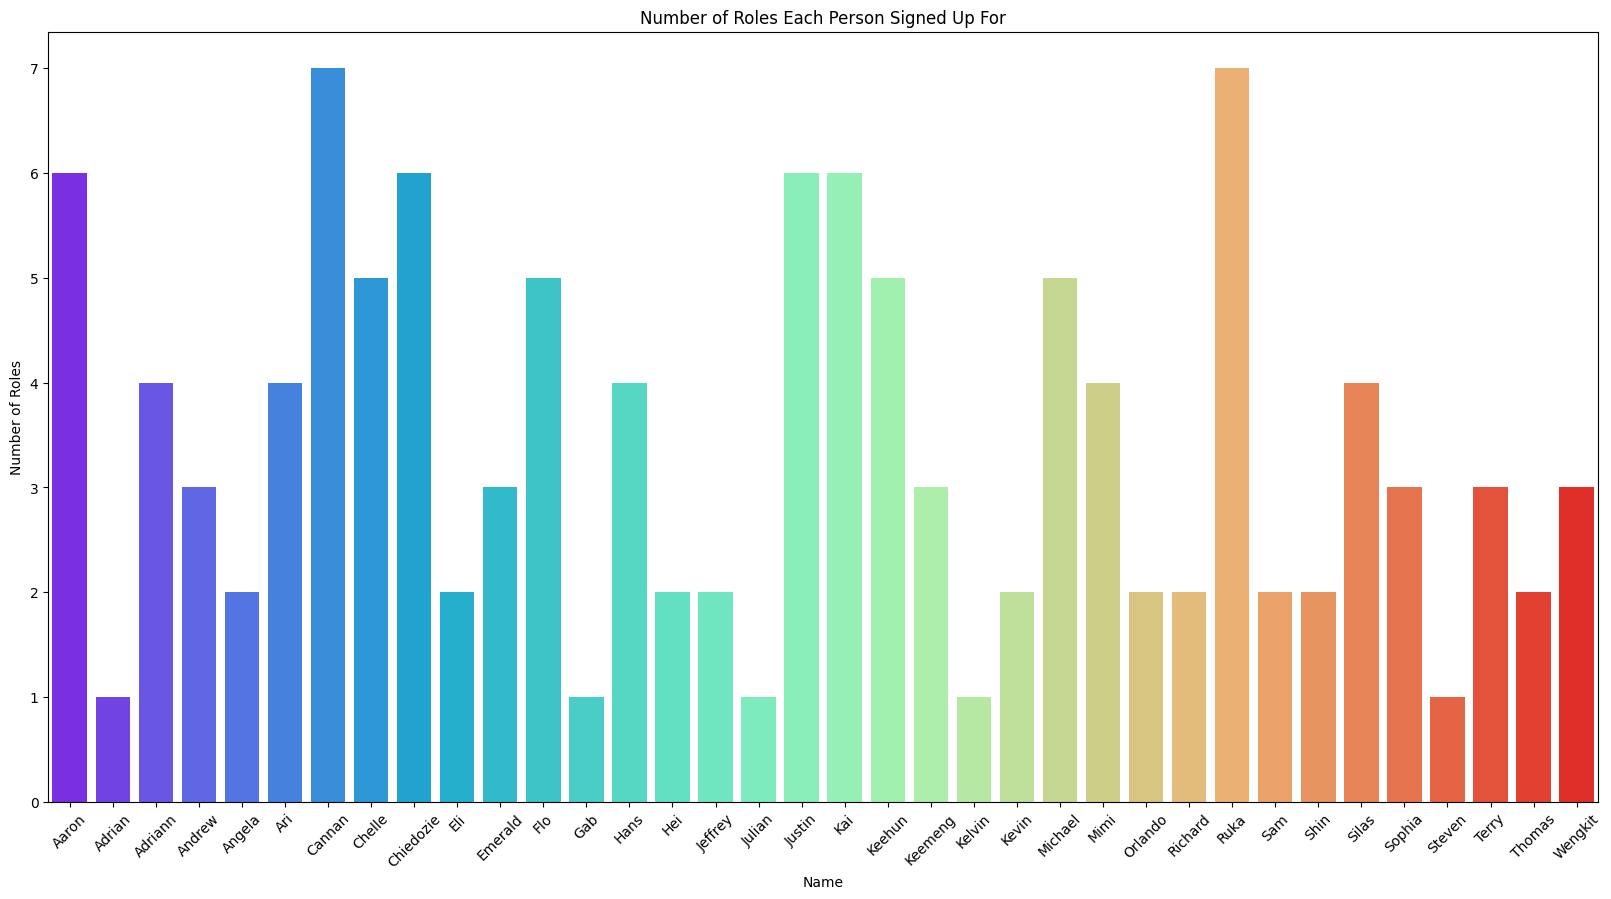

In [18]:
# Create a dataframe from people_dict
people_df = pd.DataFrame(list(people_dict.items()), columns=['Name', 'Instruments'])

# Add a column for the number of instruments each person can play
people_df['Instrument Count'] = people_df['Instruments'].apply(len)

people_df

# Plot the data
plt.figure(figsize=(20, 10))
sns.barplot(x='Name', y='Instrument Count', data=people_df, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.xticks(rotation=45)
plt.ylabel('Number of Roles')
plt.title('Number of Roles Each Person Signed Up For')
plt.show()

## Instruments and what players play them

In [19]:
# Create a dictionary for each instrument where the key is the instrument name and the value is a list of people who can play that instrument.
# Save the dictionary to a variable called instrument_dict.
instrument_dict = {}

for col in df_cleaned.columns:
    if 'want to' in col or 'don\'t mind' in col:
        instrument = col.replace(' want to', '').replace(' don\'t mind', '')
        for entry in df_cleaned[col].dropna():
            names = entry.split()
            for name in names:
                if instrument not in instrument_dict:
                    instrument_dict[instrument] = []
                if name not in instrument_dict[instrument]:
                    instrument_dict[instrument].append(name)

instrument_dict

{'Main Vox': ['Flo',
  'Hei',
  'Shin',
  'Silas',
  'Sophia',
  'Emerald',
  'Andrew',
  'Cannan',
  'Mimi',
  'Ruka',
  'Kevin',
  'Aaron',
  'Adriann',
  'Orlando',
  'Wengkit',
  'Justin',
  'Richard'],
 'Harmony/ Backup Vox': ['Flo',
  'Aaron',
  'Orlando',
  'Silas',
  'Kevin',
  'Hei',
  'Adriann',
  'Cannan',
  'Emerald',
  'Ruka',
  'Sam',
  'Mimi',
  'Ari',
  'Chiedozie'],
 'Lead Guitar': ['Aaron',
  'Justin',
  'Adriann',
  'Chelle',
  'Keehun',
  'Terry',
  'Hans',
  'Eli',
  'Kai',
  'Chiedozie',
  'Keemeng',
  'Michael'],
 'Rhythm Guitar': ['Aaron',
  'Kai',
  'Cannan',
  'Hans',
  'Justin',
  'Adriann',
  'Terry',
  'Eli',
  'Keemeng',
  'Keehun',
  'Mimi',
  'Emerald',
  'Ruka',
  'Chelle',
  'Sophia',
  'Michael'],
 'Bass': ['Kai',
  'Flo',
  'Justin',
  'Keemeng',
  'Keehun',
  'Aaron',
  'Steven',
  'Michael',
  'Sam',
  'Chiedozie',
  'Cannan',
  'Mimi',
  'Ruka',
  'Thomas'],
 'Drums': ['Thomas',
  'Adrian',
  'Aaron',
  'Kelvin',
  'Keehun',
  'Hans',
  'Kai',
  '

### GRAFS

C:\Users\maaro\AppData\Local\Temp\ipykernel_4280\139614256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Instrument', y='Player Count', data=instrument_df, palette='rainbow')


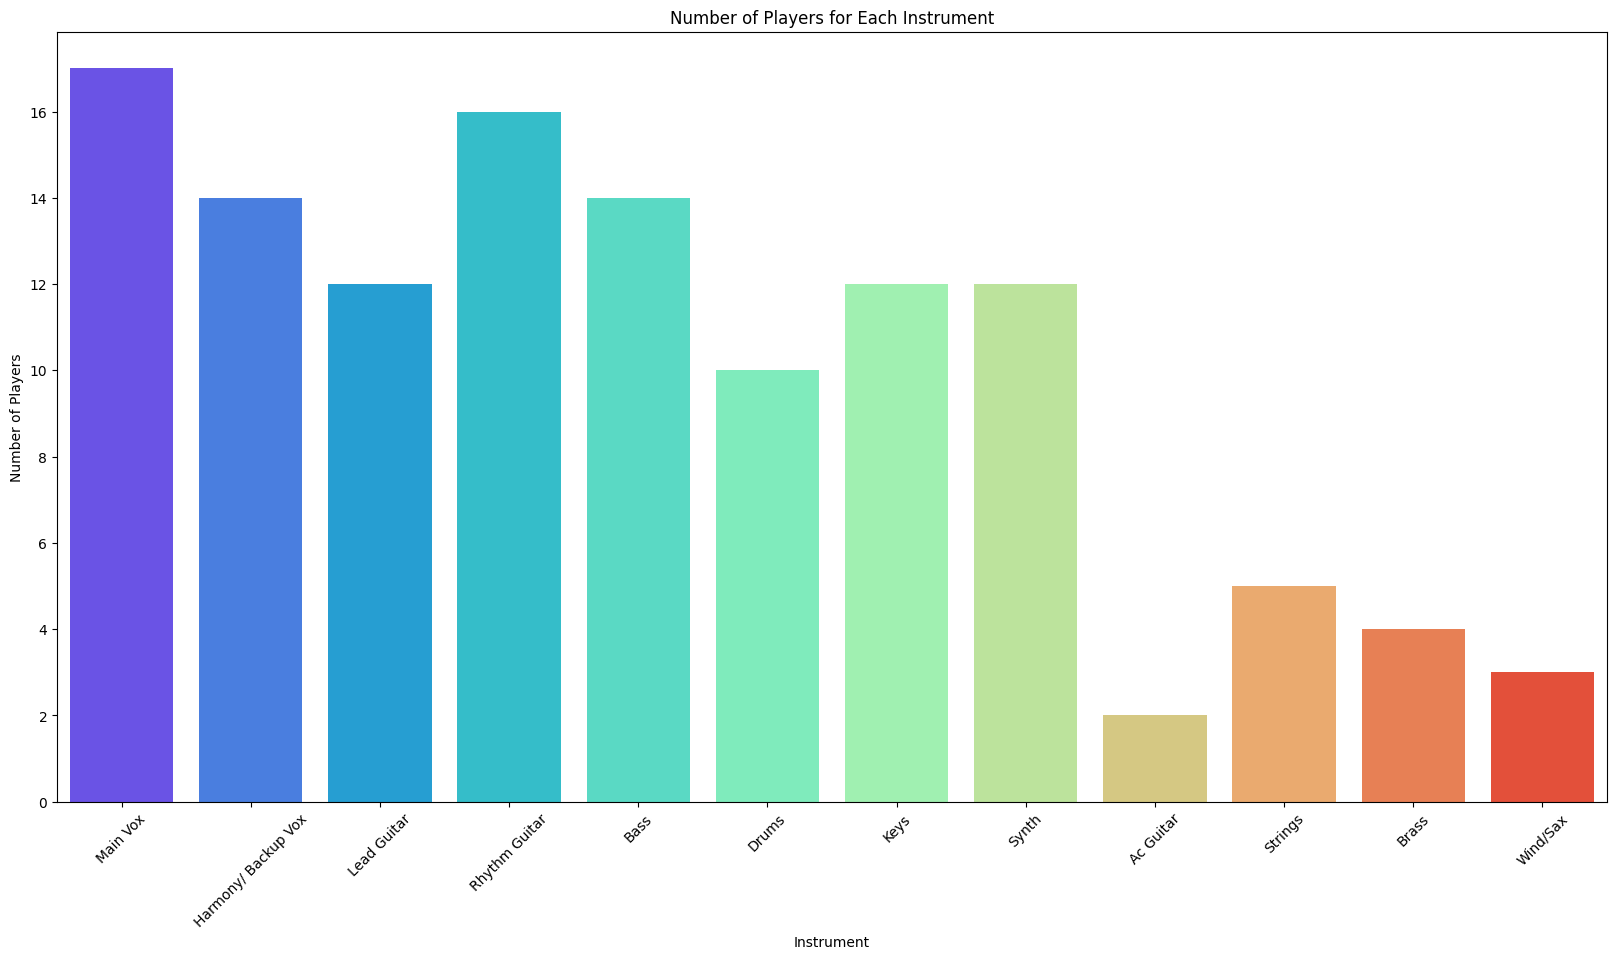

In [20]:
# Create a dataframe from instrument_dict
instrument_df = pd.DataFrame([(instrument, len(players)) for instrument, players in instrument_dict.items()], columns=['Instrument', 'Player Count'])

# Plot the data
plt.figure(figsize=(20, 10))
sns.barplot(x='Instrument', y='Player Count', data=instrument_df, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Instrument')
plt.xticks(rotation=45)
plt.ylabel('Number of Players')
plt.title('Number of Players for Each Instrument')
plt.show()

## Is a song doable?

A song is doable if there is an assignment from the list of players such that one person can fit each instrument.

In [21]:
from itertools import permutations

def find_valid_assignment(row):
    # Remove columns where the instrument is not needed, i.e. the number of players needed is 0. 
    # Save this as a dictionary where each instrument needed is a key and values is temporarily set to 0.
    instruments_needed = row[row.index[row.index.str.contains('players needed')].tolist()].dropna()
    instruments_needed = instruments_needed[instruments_needed > 0]

    # Get all the players who can play the instruments needed from the row. 
    # Save this as a dictionary where each instrument needed is a key and values is a list of players who can play that instrument.
    players = {}
    for instrument in instruments_needed.index:
        instrument_name = instrument.replace(' players needed', '')
        players[instrument_name] = row[instrument_name + ' want to'].split() + row[instrument_name + ' don\'t mind'].split()

    # Find an assignment of people to instruments that satisfies the conditions
    # Save the assignment to a dictionary where the key is the person's name and the value is the instrument they are assigned to.
    for perm in permutations(players.keys()):
        temp_assignment = {}
        valid = True
        for instrument in perm:
            assigned = False
            for player in players[instrument]:
                if player not in temp_assignment:
                    temp_assignment[player] = instrument
                    assigned = True
                    break
            if not assigned:
                valid = False
                break
        if valid:
            return True, temp_assignment

    return False, {}

# Example usage
row = df_cleaned.iloc[0]
is_valid, assignment = find_valid_assignment(row)
print(is_valid, assignment)


True {'Flo': 'Main Vox', 'Aaron': 'Lead Guitar', 'Kai': 'Bass', 'Cannan': 'Rhythm Guitar', 'Thomas': 'Drums', 'Angela': 'Synth'}


In [22]:
# Priority find valid assignment where we only find an assignment using the players who want to play the instrument.
def priority_find_valid_assignment(row):
    # Remove columns where the instrument is not needed, i.e. the number of players needed is 0. 
    # Save this as a dictionary where each instrument needed is a key and values is temporarily set to 0.
    instruments_needed = row[row.index[row.index.str.contains('players needed')].tolist()].dropna()
    instruments_needed = instruments_needed[instruments_needed > 0]

    # Get all the players who can play the instruments needed from the row. 
    # Save this as a dictionary where each instrument needed is a key and values is a list of players who can play that instrument.
    players = {}
    for instrument in instruments_needed.index:
        instrument_name = instrument.replace(' players needed', '')
        players[instrument_name] = row[instrument_name + ' want to'].split()

    # Find an assignment of people to instruments that satisfies the conditions
    # Save the assignment to a dictionary where the key is the person's name and the value is the instrument they are assigned to.
    for perm in permutations(players.keys()):
        temp_assignment = {}
        valid = True
        for instrument in perm:
            assigned = False
            for player in players[instrument]:
                if player not in temp_assignment:
                    temp_assignment[player] = instrument
                    assigned = True
                    break
            if not assigned:
                valid = False
                break
        if valid:
            return True, temp_assignment

    return False, {}

# Example usage
row = df_cleaned.iloc[0]
is_valid, assignment = find_valid_assignment(row)
print(is_valid, assignment)

True {'Flo': 'Main Vox', 'Aaron': 'Lead Guitar', 'Kai': 'Bass', 'Cannan': 'Rhythm Guitar', 'Thomas': 'Drums', 'Angela': 'Synth'}


In [23]:
df_assignments = df_cleaned.copy()

# Apply priority_find_valid_assignment to all rows in df_cleaned. If a valid assignment is found, save the assignment to a new column called "Priority Assignment".
df_assignments['Priority Assignment'] = df_assignments.apply(priority_find_valid_assignment, axis=1)

# Apply the find_valid_assignment function to each row in the df_cleaned. If a valid assignment is found, save the assignment to a new column called "Assignment".
df_assignments['Assignment'] = df_assignments.apply(find_valid_assignment, axis=1)


df_assignments


,Song,Notes,Main Vox want to,Main Vox don't mind,Harmony/ Backup Vox want to,Harmony/ Backup Vox don't mind,Lead Guitar want to,Lead Guitar don't mind,Rhythm Guitar want to,Rhythm Guitar don't mind,...,Bass players needed,Drums players needed,Keys players needed,Synth players needed,Ac Guitar players needed,Strings players needed,Brass players needed,Wind/Sax players needed,Priority Assignment,Assignment
0,The Rumbling OFFICIAL VIDEO You Tube,Metal,Flo Hei,,Flo Aaron Orlando,,Aaron,,Aaron Kai,Cannan,...,1,1,0,1,0,0,0,0,"(False, {})","(True, {'Flo': 'Main Vox', 'Aaron': 'Lead Guit..."
1,ONE ROCK The Beginning Official Music Video Yo...,Metal,Shin,Ruka,Flo,Cannan Ruka,Aaron,,Cannan,,...,1,1,1,1,0,0,0,0,"(False, {})","(True, {'Shin': 'Main Vox', 'Flo': 'Harmony/ B..."
2,Inkya Impulse インキャインパルス Asobi Asobase Ending F...,Metal,Hei Silas Flo,,Aaron Flo Silas,,Aaron,,Hans,,...,1,1,0,0,0,0,0,0,"(False, {})","(False, {})"
3,乙女どもよ。Otomedomoyo,NaN,Sophia,Sophia Mimi,,,Justin,,Justin,,...,1,1,1,1,1,3,0,0,"(False, {})","(False, {})"
4,Happy Selfishness,NaN,Sophia,,,,Justin,,,Aaron Kai,...,1,1,1,1,0,0,0,0,"(False, {})","(True, {'Sophia': 'Main Vox', 'Justin': 'Lead ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Mixed Nuts,Brass super heavy,Silas Andrew Mimi,,,,Keehun,Aaron,NaN,NaN,...,1,1,1,0,0,0,3,2,"(True, {'Silas': 'Main Vox', 'Keehun': 'Lead G...","(True, {'Silas': 'Main Vox', 'Keehun': 'Lead G..."
82,Zenzenzense,NaN,Kevin Silas Ruka,,,Silas Ruka,Aaron,Terry,Kai Ruka,Terry,...,1,1,0,0,0,0,0,0,"(False, {})","(True, {'Kevin': 'Main Vox', 'Silas': 'Harmony..."
83,,NaN,Emerald,Kevin,NaN,NaN,,,,,...,1,1,0,0,0,0,0,0,"(False, {})","(False, {})"
84,Ame Matsu,NaN,Emerald,,NaN,NaN,Aaron,,NaN,NaN,...,1,1,1,1,0,1,0,0,"(False, {})","(False, {})"


In [24]:
# Get all 'Song' with priority assignments. Save this as a list.
priority_assignments = df_assignments[df_assignments['Priority Assignment'].apply(lambda x: x[0])]['Song'].tolist()
priority_assignments

['Senbonzakura',
 'Your Lie April Medley',
 'ETERNAL FLAME VOID You Tube',
 "Heaven's Feel Medley",
 'Phony',
 'Same Blue',
 'Unknown Mother Goose',
 'SHOW',
 'CRAZY NOISY BIZARRE TOWN',
 'First Note',
 'Galactic Funk',
 'Bon Appetit',
 'LLKi',
 'Kuchizuke Diamond',
 'GHOST 星街すいせいofficial You Tube',
 '雪ノ下雪乃CV.早見沙織& 由比ヶ浜結衣CV.東山奈央 Hello Alone Audio You Tube Hello Alone',
 'Seize The Day You Tube',
 '風と行く道 You Tube',
 '春ひさぎ',
 'Lilac',
 'DADA',
 'Daddy daddy',
 'Gas gas gas',
 'ONE ROCK 「完全感覚Dreamer」',
 '君の知らない物語',
 'センチメートル',
 '星座になれたら',
 '秒針を噛む',
 'Mixed Nuts']

In [25]:
# Get all 'Song' with assignments. Save this as a list.
assignments = df_assignments[df_assignments['Assignment'].apply(lambda x: x[0])]['Song'].tolist()
assignments

['The Rumbling OFFICIAL VIDEO You Tube',
 'ONE ROCK The Beginning Official Music Video You Tube',
 'Happy Selfishness',
 'Senbonzakura',
 'Rabbit Hole',
 'Avid',
 'Your Lie April Medley',
 'Emptiness and Catharsis',
 'ETERNAL FLAME VOID You Tube',
 "Heaven's Feel Medley",
 'Phony',
 'Zanki',
 'Same Blue',
 'Haruka Kanata',
 'Unknown Mother Goose',
 'SHOW',
 'CRAZY NOISY BIZARRE TOWN',
 'First Note',
 'Galactic Funk',
 'Bon Appetit',
 'Ring your bell',
 'LLKi',
 'Kuusou Mesorogiwi',
 'Kuchizuke Diamond',
 'GHOST 星街すいせいofficial You Tube',
 '雪ノ下雪乃CV.早見沙織& 由比ヶ浜結衣CV.東山奈央 Hello Alone Audio You Tube Hello Alone',
 'Seize The Day You Tube',
 '風と行く道 You Tube',
 'Secret Base Bocchi',
 '春ひさぎ',
 'Ussewa',
 '怪獣の花唄',
 'Roundabout, 2008 remaster',
 'Lilac',
 'DADA',
 'Daddy daddy',
 'Gas gas gas',
 'ONE ROCK 「完全感覚Dreamer」',
 'K-ON! Medley',
 'connect',
 '君の知らない物語',
 '藍二乗',
 'センチメートル',
 '星座になれたら',
 '秒針を噛む',
 'Mixed Nuts',
 'Zenzenzense',
 'Hollowness']

In [26]:
# Get all 'Song' with no assignments. Save this as a list.
no_assignments = df_assignments[df_assignments['Assignment'].apply(lambda x: not x[0])]['Song'].tolist()
no_assignments

['Inkya Impulse インキャインパルス Asobi Asobase Ending Full You Tube',
 '乙女どもよ。Otomedomoyo',
 'Platinum Disco',
 'World Mine',
 'DATABASE',
 '壱雫空',
 'Star Divine You Tube',
 'THERE REASON',
 'COLORS',
 'courage',
 'Motteke! Sailor Fuku',
 "Groovin' Magic",
 'Ride Shooting Star',
 'Sakura',
 'Gokuraku Jodo 極楽浄土',
 'Pray',
 'kono yubi tomare',
 'Koi Chaos Shimobenari',
 'Survive Said The Prophet Found Lost',
 'King Gnu Sanmon shosetsu',
 '大大大大大好きな君へ♡',
 "Hana Uta FATE Heaven's Feel",
 'Eir Aoi「IGNITE」Music Video Sword Art Online You Tube',
 'Sonny Boy Rhapsody',
 'Rain and Cappucino',
 'Ama Jyaku ROCK BUT AKIE VOCAL',
 'オトノケ',
 'Luna say maybe',
 'Goutoubun katachi',
 '',
 'ドーナツホール Donut Hole',
 '匿名の讃歌',
 'ファタール GEMN Fatal GEMN',
 '星のダイアローグ',
 'うまぴょい伝説',
 '修羅場 adult ver.',
 '',
 'Ame Matsu']

### GRAFS

C:\Users\maaro\AppData\Local\Temp\ipykernel_4280\1749954962.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assignment Type', y='Count', data=assignment_counts, palette='rainbow')


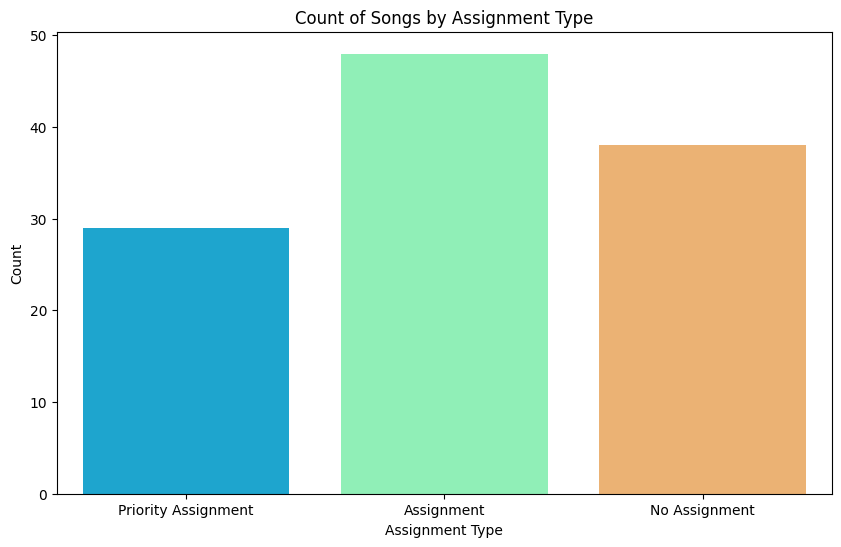

In [27]:
# Create a dataframe to hold the counts of each assignment type
assignment_counts = pd.DataFrame({
    'Assignment Type': ['Priority Assignment', 'Assignment', 'No Assignment'],
    'Count': [len(priority_assignments), len(assignments), len(no_assignments)]
})

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Assignment Type', y='Count', data=assignment_counts, palette='rainbow')
plt.xlabel('Assignment Type')
plt.ylabel('Count')
plt.title('Count of Songs by Assignment Type')
plt.show()

Note: you may need to restart the kernel to use updated packages.


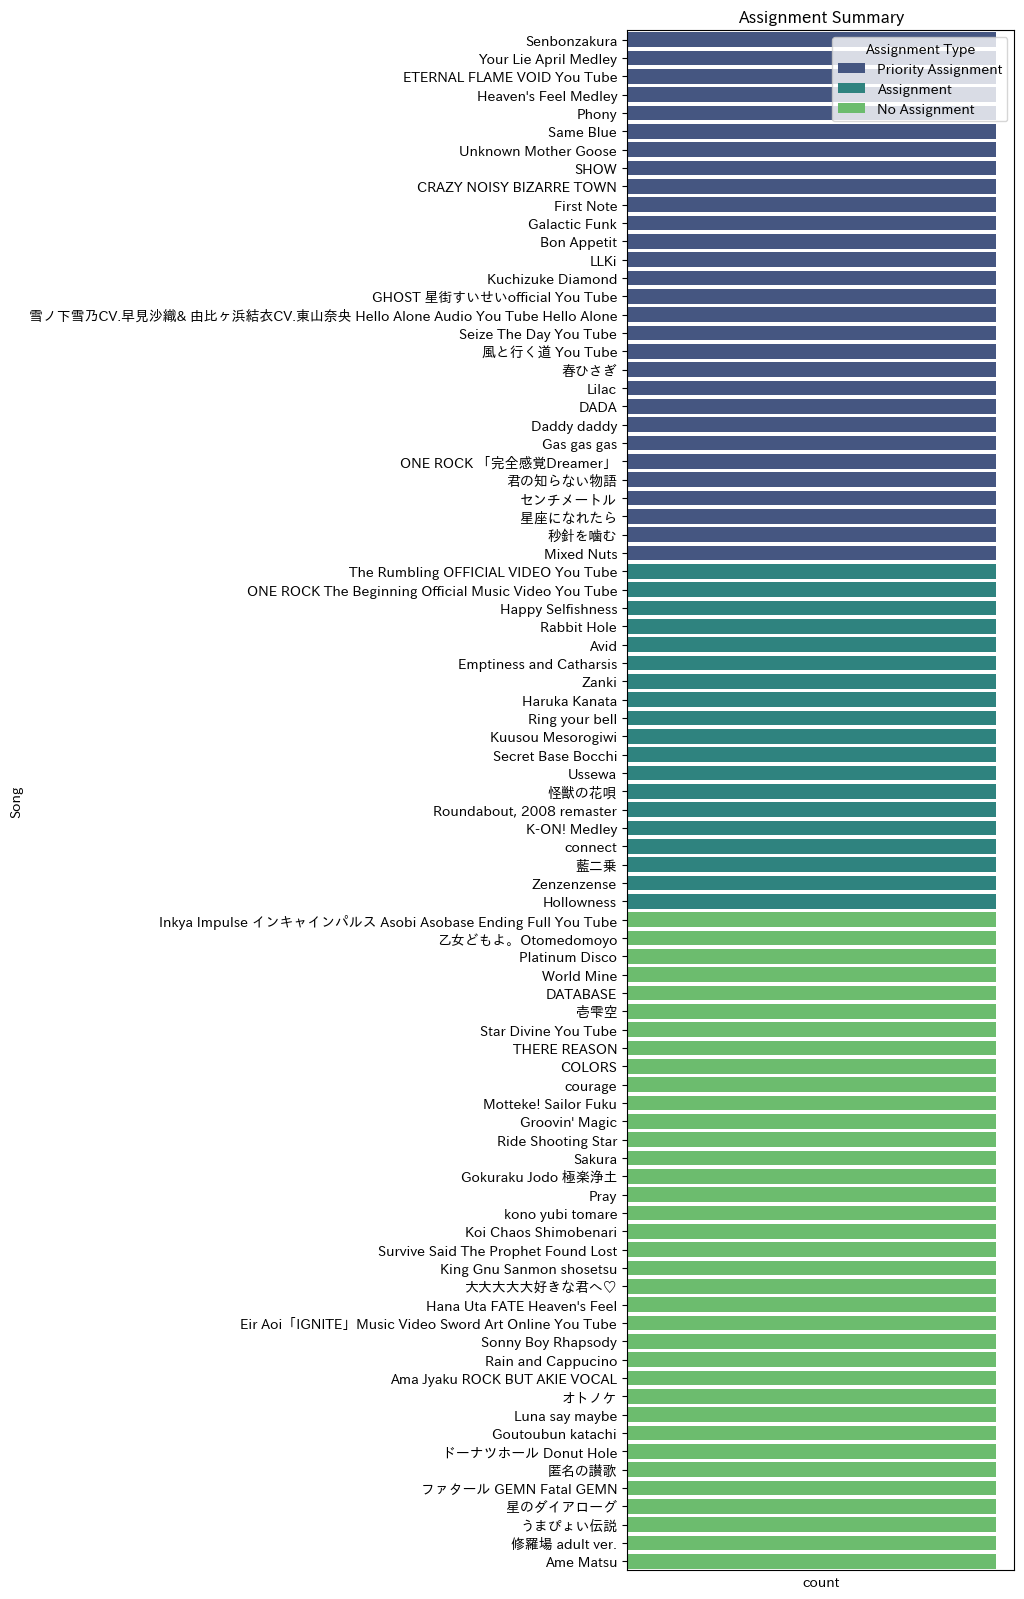

In [60]:
%pip install japanize-matplotlib

import japanize_matplotlib

# Create a dataframe for priority_assignments, assignments, and no_assignments
# with the columns 'Song', 'Assignment Type'
# If the song is in priority_assignments, the 'Assignment Type' should be 'Priority Assignment'
# If the song is in assignments, the 'Assignment Type' should be 'Assignment'
# If the song is in no_assignments, the 'Assignment Type' should be 'No Assignment'
assignment_data = []

for song in priority_assignments:
    assignment_data.append({'Song': song, 'Assignment Type': 'Priority Assignment'})

for song in assignments:
    if song not in priority_assignments:
        assignment_data.append({'Song': song, 'Assignment Type': 'Assignment'})

for song in no_assignments:
    assignment_data.append({'Song': song, 'Assignment Type': 'No Assignment'})

df_assignments_summary = pd.DataFrame(assignment_data)

# Remove empty strings from the 'Song' column
df_assignments_summary = df_assignments_summary[df_assignments_summary['Song'] != '']

# Do a layered bar plot of the data, where the y axis is the song and the x axis is the assignment type.
plt.figure(figsize=(5, 20))
sns.countplot(y='Song', hue='Assignment Type', data=df_assignments_summary, palette='viridis')
# Remove numbers from the x-axis
plt.xticks([])
plt.ylabel('Song')
plt.title('Assignment Summary')
plt.show()


## Getting number of signups

In [28]:
df = pd.read_csv(BytesIO(data))
df.head()

,Suggestor,Song,Show,Artist,Resources \nto use,Interested,Arranger,Main Vox,Harmony/ Backup Vox,Lead Guitar,...,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other,Additional Comments,Notes
0,Aaron,SiM – The Rumbling (OFFICIAL VIDEO) - YouTube,Attack on Titan Final Season,SiM (Silence iz Mine),Online Tabs / By Ear,"Andrew, Gabriel",1? (Aaron),"1/2\n(Flo, Hei)","1+\n(Flo, Aaron, Orlando)",1 \n(Aaron),...,1\n(Thomas)\n,NaN,"1\n(Flo)\n[Cannan, Angela]",NaN,NaN,NaN,NaN,NaN,"EXTENDED RANGE GUITARS, SCREAMING, RAWR, also ...",Metal
1,Aaron,ONE OK ROCK - The Beginning [Official Music Vi...,Ruroni Kenshin Live Action,ONE OK ROCK,Online Tabs / By Ear,NaN,1? (Aaron),1 \n(Shin)\n[Ruka],"1\n(Flo)\n[Cannan, Ruka]",1 \n(Aaron),...,1 \n(Adrian),1 \n(Angela)\n[Michael],1\n\n[Cannan],NaN,NaN,NaN,NaN,NaN,"Piano/Synth can be done by one person, Instrum...",Metal
2,Aaron\n(Encore),Inkya Impulse (インキャインパルス) Asobi Asobase Ending...,Asobi Asobase,"CV: Hina Kino, CV: Rika Nagae, CV: Konomi Koha...",Online Tabs,Gabriel,1? (Aaron),"2 \n(Hei, Silas, Flo)","1+\n(Aaron, Flo, Silas)",1 \n(Aaron),...,1\n\n[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SCREAMS AND CUTE GIRLS SINGING, extended range...",Metal
3,Adrian,乙女どもよ。\nOtomedomoyo,O Maidens in Your Savage Season,CHiCO with Honeyworks,Online tabs / by ear,Gabriel,Justin + Greta working,1\n（Sophia）\n[Mimi],1?,1 \n(Justin),...,1 \n(Adrian),1\n(Cannan),1/2 \n(Cannan synth 1)\n[Kai],1\n\n[Kai],"3\n\n[Andrew, Julian, Chelle]",NaN,NaN,NaN,"If metric, then strings will be barely audible...",NaN
4,Adrian,Happy Selfishness,\nN/A,Sangatsu no Phantasia,Arrangement / by ear,Gabriel,(Jamie),1\n\n(Sophia),1?,1 \n(Justin),...,1 \n(Adrian),1\n(Cannan),1 \n\n[Kai],NaN,NaN,NaN,NaN,NaN,"Synth effect same as Inferno (winter24), harmo...",NaN


In [29]:
# Drop first 8 columns and last 2 columns
cols = [0,1,2,3,4,5,6,df.columns.size - 2, df.columns.size - 1]
df.drop(df.columns[cols],axis=1,inplace=True)
df

,Main Vox,Harmony/ Backup Vox,Lead Guitar,Rhythm Guitar,Bass,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other
0,"1/2\n(Flo, Hei)","1+\n(Flo, Aaron, Orlando)",1 \n(Aaron),"1 \n(Aaron, Kai)\n[Cannan]","1\n(Kai, Flo)\n",1\n(Thomas)\n,NaN,"1\n(Flo)\n[Cannan, Angela]",NaN,NaN,NaN,NaN,NaN
1,1 \n(Shin)\n[Ruka],"1\n(Flo)\n[Cannan, Ruka]",1 \n(Aaron),1?\n(Cannan),1\n(Justin)\n[Sam],1 \n(Adrian),1 \n(Angela)\n[Michael],1\n\n[Cannan],NaN,NaN,NaN,NaN,NaN
2,"2 \n(Hei, Silas, Flo)","1+\n(Aaron, Flo, Silas)",1 \n(Aaron),1\n(Hans),1\n(KM),1\n\n[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1\n（Sophia）\n[Mimi],1?,1 \n(Justin),1\n(Justin using an acoustic pedal),1 \n(KM)\n[Aaron],1 \n(Adrian),1\n(Cannan),1/2 \n(Cannan synth 1)\n[Kai],1\n\n[Kai],"3\n\n[Andrew, Julian, Chelle]",NaN,NaN,NaN
4,1\n\n(Sophia),1?,1 \n(Justin),"1? \n\n[Aaron, Kai]",1\n(KH)\n[KM],1 \n(Adrian),1\n(Cannan),1 \n\n[Kai],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7,0,2.54%,0.53%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,8,0,5.08%,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,3,0,0.34%,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,1,0,0.17%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Drop every row after the 88th row
df.drop(df.index[88:], inplace=True)
df

,Main Vox,Harmony/ Backup Vox,Lead Guitar,Rhythm Guitar,Bass,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other
0,"1/2\n(Flo, Hei)","1+\n(Flo, Aaron, Orlando)",1 \n(Aaron),"1 \n(Aaron, Kai)\n[Cannan]","1\n(Kai, Flo)\n",1\n(Thomas)\n,NaN,"1\n(Flo)\n[Cannan, Angela]",NaN,NaN,NaN,NaN,NaN
1,1 \n(Shin)\n[Ruka],"1\n(Flo)\n[Cannan, Ruka]",1 \n(Aaron),1?\n(Cannan),1\n(Justin)\n[Sam],1 \n(Adrian),1 \n(Angela)\n[Michael],1\n\n[Cannan],NaN,NaN,NaN,NaN,NaN
2,"2 \n(Hei, Silas, Flo)","1+\n(Aaron, Flo, Silas)",1 \n(Aaron),1\n(Hans),1\n(KM),1\n\n[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1\n（Sophia）\n[Mimi],1?,1 \n(Justin),1\n(Justin using an acoustic pedal),1 \n(KM)\n[Aaron],1 \n(Adrian),1\n(Cannan),1/2 \n(Cannan synth 1)\n[Kai],1\n\n[Kai],"3\n\n[Andrew, Julian, Chelle]",NaN,NaN,NaN
4,1\n\n(Sophia),1?,1 \n(Justin),"1? \n\n[Aaron, Kai]",1\n(KH)\n[KM],1 \n(Adrian),1\n(Cannan),1 \n\n[Kai],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2 \n(Emerald)\n[Kevin],NaN,1,2,1\n(Steven),1 \n(Thomas),NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,1\n(Emerald),NaN,1\n(Aaron),NaN,1,1\n(Weng Kit),1 \n\n[Michael],1 \n,NaN,"1\n\n[Andrew, Julian]",NaN,NaN,NaN
85,1\n(Mimi)\n[Sophia],NaN,1\n(Aaron),1\n(Kai) \n[Michael],"1 \n\n[Michael], (Sam)",1 \n(Weng Kit),1\n(Michael)\n[Cannan],NaN,1\n(Kai),NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Remove any non-alphabet characters everywhere but leave spaces and [ ] and ( )
df = df.replace({'[^A-Za-z\[\]\(\) ]':''}, regex=True)
df

,Main Vox,Harmony/ Backup Vox,Lead Guitar,Rhythm Guitar,Bass,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other
0,(Flo Hei),(Flo Aaron Orlando),(Aaron),(Aaron Kai)[Cannan],(Kai Flo),(Thomas),NaN,(Flo)[Cannan Angela],NaN,NaN,NaN,NaN,NaN
1,(Shin)[Ruka],(Flo)[Cannan Ruka],(Aaron),(Cannan),(Justin)[Sam],(Adrian),(Angela)[Michael],[Cannan],NaN,NaN,NaN,NaN,NaN
2,(Hei Silas Flo),(Aaron Flo Silas),(Aaron),(Hans),(KM),[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sophia[Mimi],,(Justin),(Justin using an acoustic pedal),(KM)[Aaron],(Adrian),(Cannan),(Cannan synth )[Kai],[Kai],[Andrew Julian Chelle],NaN,NaN,NaN
4,(Sophia),,(Justin),[Aaron Kai],(KH)[KM],(Adrian),(Cannan),[Kai],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,(Emerald)[Kevin],NaN,,,(Steven),(Thomas),NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,(Emerald),NaN,(Aaron),NaN,,(Weng Kit),[Michael],,NaN,[Andrew Julian],NaN,NaN,NaN
85,(Mimi)[Sophia],NaN,(Aaron),(Kai) [Michael],[Michael] (Sam),(Weng Kit),(Michael)[Cannan],NaN,(Kai),NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Each cell in the dataframe contains a name, or multiple names separated by spaces. 
# We want to replace all instances of KM with Kee Meng, and all instances of 'Adrian N' with 'AdrianN'.
df = df.replace({'KM': 'Keemeng', 
                 'Adrian N': 'Adriann', 
                 'Weng Kit': 'Wengkit', 
                 'chiedozie': 'Chiedozie', 
                 'ORLANDO': 'Orlando',
                 'KH': 'Keehun',
                 }, regex=True)
df

,Main Vox,Harmony/ Backup Vox,Lead Guitar,Rhythm Guitar,Bass,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other
0,(Flo Hei),(Flo Aaron Orlando),(Aaron),(Aaron Kai)[Cannan],(Kai Flo),(Thomas),NaN,(Flo)[Cannan Angela],NaN,NaN,NaN,NaN,NaN
1,(Shin)[Ruka],(Flo)[Cannan Ruka],(Aaron),(Cannan),(Justin)[Sam],(Adrian),(Angela)[Michael],[Cannan],NaN,NaN,NaN,NaN,NaN
2,(Hei Silas Flo),(Aaron Flo Silas),(Aaron),(Hans),(Keemeng),[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sophia[Mimi],,(Justin),(Justin using an acoustic pedal),(Keemeng)[Aaron],(Adrian),(Cannan),(Cannan synth )[Kai],[Kai],[Andrew Julian Chelle],NaN,NaN,NaN
4,(Sophia),,(Justin),[Aaron Kai],(Keehun)[Keemeng],(Adrian),(Cannan),[Kai],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,(Emerald)[Kevin],NaN,,,(Steven),(Thomas),NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,(Emerald),NaN,(Aaron),NaN,,(Wengkit),[Michael],,NaN,[Andrew Julian],NaN,NaN,NaN
85,(Mimi)[Sophia],NaN,(Aaron),(Kai) [Michael],[Michael] (Sam),(Wengkit),(Michael)[Cannan],NaN,(Kai),NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Remove rows that have all NaN values
df = df.dropna(how='all')
df

,Main Vox,Harmony/ Backup Vox,Lead Guitar,Rhythm Guitar,Bass,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other
0,(Flo Hei),(Flo Aaron Orlando),(Aaron),(Aaron Kai)[Cannan],(Kai Flo),(Thomas),NaN,(Flo)[Cannan Angela],NaN,NaN,NaN,NaN,NaN
1,(Shin)[Ruka],(Flo)[Cannan Ruka],(Aaron),(Cannan),(Justin)[Sam],(Adrian),(Angela)[Michael],[Cannan],NaN,NaN,NaN,NaN,NaN
2,(Hei Silas Flo),(Aaron Flo Silas),(Aaron),(Hans),(Keemeng),[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sophia[Mimi],,(Justin),(Justin using an acoustic pedal),(Keemeng)[Aaron],(Adrian),(Cannan),(Cannan synth )[Kai],[Kai],[Andrew Julian Chelle],NaN,NaN,NaN
4,(Sophia),,(Justin),[Aaron Kai],(Keehun)[Keemeng],(Adrian),(Cannan),[Kai],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,(Silas Andrew Mimi),,(Keehun)[Aaron],NaN,(Mimi Keemeng Steven Sam Chiedozie),(Thomas Wengkit),(Cannan Michael),NaN,NaN,NaN,(Jeffrey Wengkit)[Richard],(Gab Ruka)[Chiedozie],NaN
82,(Kevin Silas Ruka),[Silas Ruka],(Aaron)[Terry],(Kai Ruka) [Terry],(Kai Ruka Steven),(Thomas)[Wengkit],NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,(Emerald)[Kevin],NaN,,,(Steven),(Thomas),NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,(Emerald),NaN,(Aaron),NaN,,(Wengkit),[Michael],,NaN,[Andrew Julian],NaN,NaN,NaN


In [34]:
# Add a space if a string has a lowercase followed by an uppercase and is of length >3
df = df.replace({'([a-z])([A-Z])': r'\1 \2'}, regex=True)
df

,Main Vox,Harmony/ Backup Vox,Lead Guitar,Rhythm Guitar,Bass,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other
0,(Flo Hei),(Flo Aaron Orlando),(Aaron),(Aaron Kai)[Cannan],(Kai Flo),(Thomas),NaN,(Flo)[Cannan Angela],NaN,NaN,NaN,NaN,NaN
1,(Shin)[Ruka],(Flo)[Cannan Ruka],(Aaron),(Cannan),(Justin)[Sam],(Adrian),(Angela)[Michael],[Cannan],NaN,NaN,NaN,NaN,NaN
2,(Hei Silas Flo),(Aaron Flo Silas),(Aaron),(Hans),(Keemeng),[Aaron],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sophia[Mimi],,(Justin),(Justin using an acoustic pedal),(Keemeng)[Aaron],(Adrian),(Cannan),(Cannan synth )[Kai],[Kai],[Andrew Julian Chelle],NaN,NaN,NaN
4,(Sophia),,(Justin),[Aaron Kai],(Keehun)[Keemeng],(Adrian),(Cannan),[Kai],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,(Silas Andrew Mimi),,(Keehun)[Aaron],NaN,(Mimi Keemeng Steven Sam Chiedozie),(Thomas Wengkit),(Cannan Michael),NaN,NaN,NaN,(Jeffrey Wengkit)[Richard],(Gab Ruka)[Chiedozie],NaN
82,(Kevin Silas Ruka),[Silas Ruka],(Aaron)[Terry],(Kai Ruka) [Terry],(Kai Ruka Steven),(Thomas)[Wengkit],NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,(Emerald)[Kevin],NaN,,,(Steven),(Thomas),NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,(Emerald),NaN,(Aaron),NaN,,(Wengkit),[Michael],,NaN,[Andrew Julian],NaN,NaN,NaN


In [35]:
# Add a space between brackets and the name and parenthesis and the name
df = df.replace({'(\[)([A-Za-z])': r'\1 \2', '([A-Za-z])(\])': r'\1 \2', '(\()([A-Za-z])': r'\1 \2', '([A-Za-z])(\))': r'\1 \2'}, regex=True)
df

,Main Vox,Harmony/ Backup Vox,Lead Guitar,Rhythm Guitar,Bass,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other
0,( Flo Hei ),( Flo Aaron Orlando ),( Aaron ),( Aaron Kai )[ Cannan ],( Kai Flo ),( Thomas ),NaN,( Flo )[ Cannan Angela ],NaN,NaN,NaN,NaN,NaN
1,( Shin )[ Ruka ],( Flo )[ Cannan Ruka ],( Aaron ),( Cannan ),( Justin )[ Sam ],( Adrian ),( Angela )[ Michael ],[ Cannan ],NaN,NaN,NaN,NaN,NaN
2,( Hei Silas Flo ),( Aaron Flo Silas ),( Aaron ),( Hans ),( Keemeng ),[ Aaron ],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sophia[ Mimi ],,( Justin ),( Justin using an acoustic pedal ),( Keemeng )[ Aaron ],( Adrian ),( Cannan ),( Cannan synth )[ Kai ],[ Kai ],[ Andrew Julian Chelle ],NaN,NaN,NaN
4,( Sophia ),,( Justin ),[ Aaron Kai ],( Keehun )[ Keemeng ],( Adrian ),( Cannan ),[ Kai ],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,( Silas Andrew Mimi ),,( Keehun )[ Aaron ],NaN,( Mimi Keemeng Steven Sam Chiedozie ),( Thomas Wengkit ),( Cannan Michael ),NaN,NaN,NaN,( Jeffrey Wengkit )[ Richard ],( Gab Ruka )[ Chiedozie ],NaN
82,( Kevin Silas Ruka ),[ Silas Ruka ],( Aaron )[ Terry ],( Kai Ruka ) [ Terry ],( Kai Ruka Steven ),( Thomas )[ Wengkit ],NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,( Emerald )[ Kevin ],NaN,,,( Steven ),( Thomas ),NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,( Emerald ),NaN,( Aaron ),NaN,,( Wengkit ),[ Michael ],,NaN,[ Andrew Julian ],NaN,NaN,NaN


In [36]:
# Add a space between parentheses and the brackets and brackets and the parentheses, i.e. ]( -> ] ( and )[ -> ) [ and )( -> ) ( and ][ -> ] [ and ]) -> ) ] and ]( -> ] (
df = df.replace({'\]\(': r'] (', '\)\[': r') [', '\)\(': r') (', '\]\[': r'] [', '\)\]': r') ]', '\]\(': r'] ('}, regex=True)
df

,Main Vox,Harmony/ Backup Vox,Lead Guitar,Rhythm Guitar,Bass,Drums,Keys,Synth,Ac Guitar,Strings,Brass,Wind/Sax,Other
0,( Flo Hei ),( Flo Aaron Orlando ),( Aaron ),( Aaron Kai ) [ Cannan ],( Kai Flo ),( Thomas ),NaN,( Flo ) [ Cannan Angela ],NaN,NaN,NaN,NaN,NaN
1,( Shin ) [ Ruka ],( Flo ) [ Cannan Ruka ],( Aaron ),( Cannan ),( Justin ) [ Sam ],( Adrian ),( Angela ) [ Michael ],[ Cannan ],NaN,NaN,NaN,NaN,NaN
2,( Hei Silas Flo ),( Aaron Flo Silas ),( Aaron ),( Hans ),( Keemeng ),[ Aaron ],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sophia[ Mimi ],,( Justin ),( Justin using an acoustic pedal ),( Keemeng ) [ Aaron ],( Adrian ),( Cannan ),( Cannan synth ) [ Kai ],[ Kai ],[ Andrew Julian Chelle ],NaN,NaN,NaN
4,( Sophia ),,( Justin ),[ Aaron Kai ],( Keehun ) [ Keemeng ],( Adrian ),( Cannan ),[ Kai ],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,( Silas Andrew Mimi ),,( Keehun ) [ Aaron ],NaN,( Mimi Keemeng Steven Sam Chiedozie ),( Thomas Wengkit ),( Cannan Michael ),NaN,NaN,NaN,( Jeffrey Wengkit ) [ Richard ],( Gab Ruka ) [ Chiedozie ],NaN
82,( Kevin Silas Ruka ),[ Silas Ruka ],( Aaron ) [ Terry ],( Kai Ruka ) [ Terry ],( Kai Ruka Steven ),( Thomas ) [ Wengkit ],NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,( Emerald ) [ Kevin ],NaN,,,( Steven ),( Thomas ),NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,( Emerald ),NaN,( Aaron ),NaN,,( Wengkit ),[ Michael ],,NaN,[ Andrew Julian ],NaN,NaN,NaN


In [37]:
parentheses_name_count = {}
bracket_name_count = {}
all_words = ' '.join(df.astype(str).values.flatten()).split()
bracket_stack = []

bracket_count = 0
parentheses_count = 0
for word in all_words:
    if word == '[':
        bracket_stack.append(word)
        bracket_count += 1
    elif word == ']':
        if bracket_stack:
            bracket_stack.pop()
            bracket_count += 1
    elif word == '(':
        bracket_stack.append(word)
        parentheses_count += 1
    elif word == ')':
        if bracket_stack:
            bracket_stack.pop()
            parentheses_count += 1
    else:
        if bracket_stack and bracket_stack[-1] == '(':
            if word in parentheses_name_count:
                parentheses_name_count[word] += 1
            else:
                parentheses_name_count[word] = 1
        elif bracket_stack and bracket_stack[-1] == '[':
            if word in bracket_name_count:
                bracket_name_count[word] += 1
            else:
                bracket_name_count[word] = 1

for word in list(parentheses_name_count.keys()):
    if word[0].islower() or word == 'Shamisen' or word == 'MF' or len(word) < 3:
        del parentheses_name_count[word]
for word in list(bracket_name_count.keys()):
    if word[0].islower() or word == 'Shamisen' or word == 'MF' or len(word) < 3:
        del bracket_name_count[word]

all_names = set(parentheses_name_count.keys()) | set(bracket_name_count.keys())
name_count = {}
for name in all_names:
    p_count = parentheses_name_count.get(name, 0)
    b_count = bracket_name_count.get(name, 0)
    name_count[name] = [p_count, b_count, p_count + b_count]

name_count = dict(sorted(name_count.items()))
name_count

{'Aaron': [52, 23, 75],
 'Adrian': [19, 11, 30],
 'Adriann': [24, 6, 30],
 'Andrew': [12, 20, 32],
 'Angela': [8, 7, 15],
 'Ari': [9, 8, 17],
 'Cannan': [44, 32, 76],
 'Chelle': [25, 14, 39],
 'Chiedozie': [16, 14, 30],
 'Eli': [2, 1, 3],
 'Emerald': [16, 1, 17],
 'Flo': [19, 8, 27],
 'Gab': [9, 1, 10],
 'Hans': [6, 9, 15],
 'Hei': [10, 2, 12],
 'Jane': [1, 0, 1],
 'Jeffrey': [7, 2, 9],
 'Julian': [5, 19, 24],
 'Justin': [22, 13, 35],
 'Kai': [24, 16, 40],
 'Keehun': [27, 4, 31],
 'Keemeng': [30, 13, 43],
 'Kelvin': [6, 1, 7],
 'Kevin': [7, 1, 8],
 'Michael': [32, 23, 55],
 'Mimi': [15, 13, 28],
 'Orlando': [5, 2, 7],
 'Richard': [6, 6, 12],
 'Ruka': [12, 20, 32],
 'Sam': [13, 10, 23],
 'Shin': [10, 1, 11],
 'Silas': [29, 14, 43],
 'Sophia': [14, 6, 20],
 'Steven': [12, 1, 13],
 'Terry': [28, 23, 51],
 'Thomas': [15, 13, 28],
 'Wengkit': [8, 15, 23]}

In [38]:
print(bracket_stack)
print(bracket_count)
print(parentheses_count)

[]
562
860


In [39]:
# Locate where there are no closing brackets or parentheses
unclosed_brackets = []
unclosed_parentheses = []

for i, word in enumerate(all_words):
    if word == '[':
        unclosed_brackets.append(i)
    elif word == ']':
        if unclosed_brackets:
            unclosed_brackets.pop()
    elif word == '(':
        unclosed_parentheses.append(i)
    elif word == ')':
        if unclosed_parentheses:
            unclosed_parentheses.pop()

unclosed_brackets, unclosed_parentheses

([], [])

In [40]:
# Print index 590 - 610
all_words[590:610]

['[',
 'Ari',
 ']',
 'nan',
 'nan',
 '(',
 'Mimi',
 ')',
 '(',
 'Flo',
 ')',
 '(',
 'Justin',
 ')',
 '[',
 'Chelle',
 ']',
 '(',
 'Kai',
 ')']

### GRAFS

In [41]:
# Create a graph where the x-axis is the name and the y-axis is the count of the name
name_count_df = pd.DataFrame(name_count).T
name_count_df.columns = ['parentheses', 'brackets', 'total']
name_count_df = name_count_df.sort_values(by='total', ascending=False)
name_count_df = name_count_df.reset_index()
name_count_df.columns = ['name', 'parentheses', 'brackets', 'total']

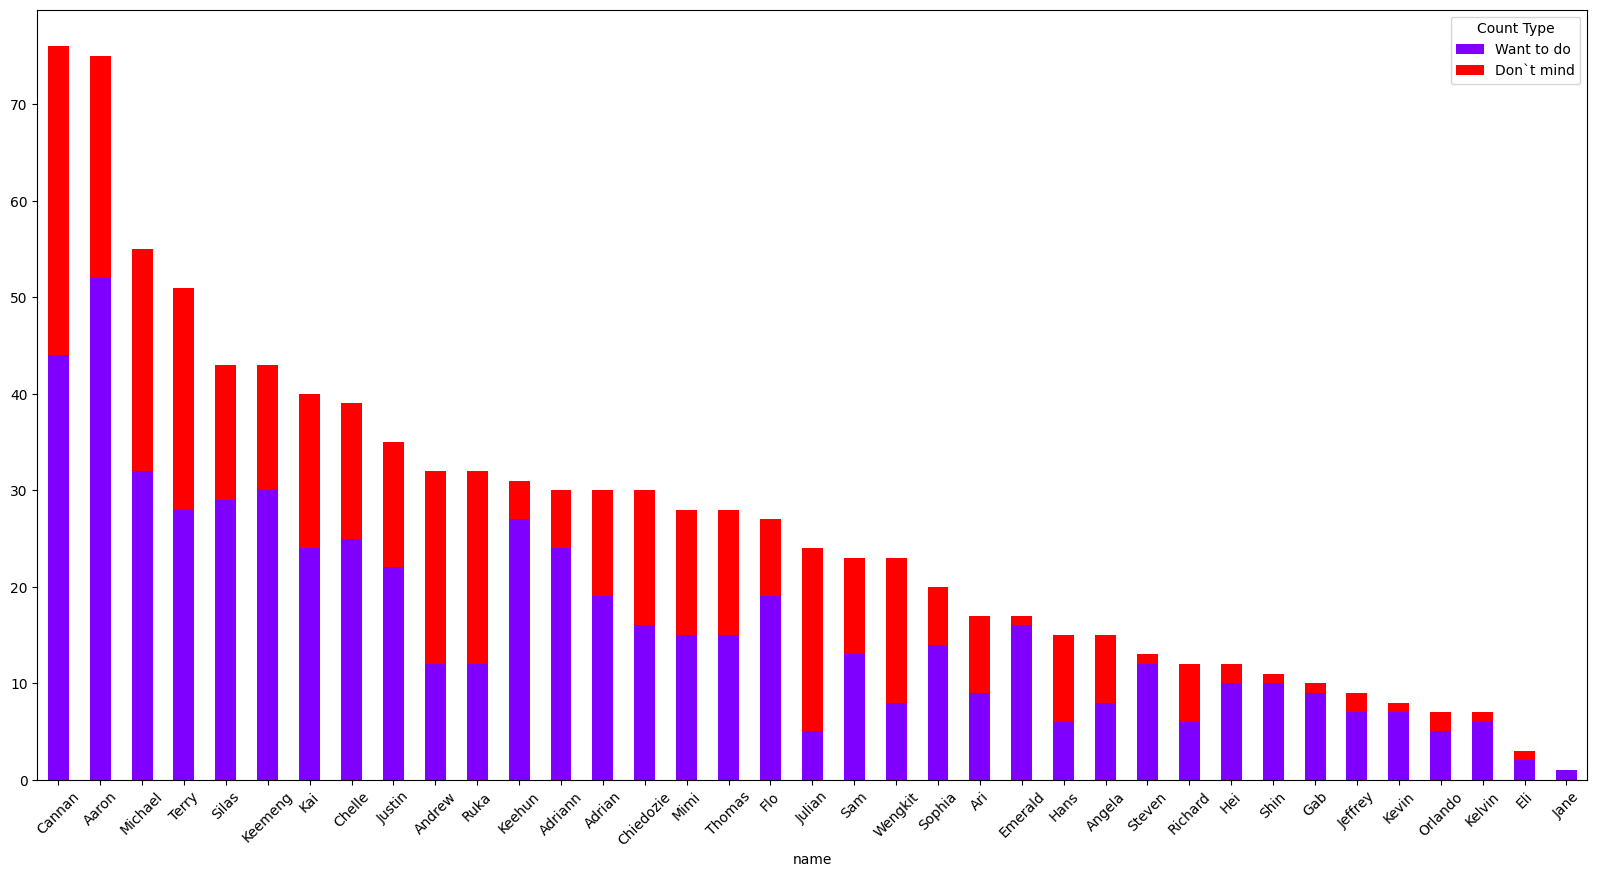

In [42]:
# Plot the number of names in parentheses and brackets as a stacked bar chart, without the total
name_count_df_no_total = name_count_df.drop(columns='total')
name_count_df_no_total = name_count_df_no_total.set_index('name')
name_count_df_no_total.plot(kind='bar', stacked=True, figsize=(20,10), colormap='rainbow')
plt.xticks(rotation=45)
# Change color labels
plt.legend(title='Count Type', labels=['Want to do', 'Don`t mind'])
plt.show()